In [2]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import patches as mpatches
from sklearn import preprocessing
import wfdb
import copy as cp
import scipy.signal as signal
from scipy import stats
from sklearn import preprocessing
from tqdm import tqdm
import os
import re
import pandas as pd
import pickle
import csv

In [3]:
rlist = []
records = os.path.normpath('mit-bih-dataframes/subject_list.csv')
with open(records) as rfile:
    recordreader = csv.reader(rfile, delimiter=' ', quotechar='|')
    for row in recordreader:
        rlist.append(row[0])

In [4]:
rr_ints = []
for x in tqdm(rlist):
    rr_ints.append(pd.read_csv(os.path.normpath('mit-bih-extracted/'+x+'_rr_rhythms.csv'), index_col=0))

rr_ints[22].tail()

100%|██████████| 23/23 [00:00<00:00, 24.26it/s]


,rr_int,rr_int_seconds,rhythms,rmean,rmean_seconds,drmean
59470,173,0.692,A,99.326854,0.397307,24.557715
59471,157,0.628,A,113.745140,0.454981,14.418287
59472,68,0.272,A,102.308855,0.409235,-11.436285
59473,69,0.276,A,93.981641,0.375927,-8.327214
59474,53,0.212,A,83.736231,0.334945,-10.245410


In [5]:
def plot_time_plot(data, selection, column, nrows, ncols, title):
    plt.figure(figsize=(28, 12))
    
    for idx, x in enumerate(selection):
        ax = plt.subplot(nrows, ncols, idx + 1)
        ax.set_title('Subject '+str(x), fontsize=28)
        ax.set_xlabel('RR-Intervals elapsed', fontsize=24)
        ax.set_ylabel('Running mean length (seconds)', fontsize=24)
        ax.tick_params(labelsize=22)

        df = data[x-1]

        current = df['rhythms'][0]
        currentdata = []
        lastidx = 0
        counter = 0
        print("Plot "+str(idx+1)+", Subject "+str(x))
        for index, row in tqdm(df.iterrows()):
            if index == len(df)-1:
                currentdata.append(row[column])
                if current == 'N':
                    ax.plot(list(range(lastidx, index+1)), currentdata, color='darkcyan')
                elif current == 'A':
                    ax.plot(list(range(lastidx, index+1)), currentdata, color='orange')
                elif current == 'O':
                    ax.plot(list(range(lastidx, index+1)), currentdata, color='salmon')
            elif row['rhythms'] == current:
                currentdata.append(row[column])
            else:
                if current == 'N':
                    ax.plot(list(range(lastidx, index)), currentdata, color='darkcyan')
                elif current == 'A':
                    ax.plot(list(range(lastidx, index)), currentdata, color='orange')
                elif current == 'O':
                    ax.plot(list(range(lastidx, index)), currentdata, color='salmon')
                lastidx = index
                current = row['rhythms']
                currentdata = [row[column]]

        ax.axhline(y=df[df['rhythms'] == 'N'][column].mean(), color="darkslategray", linestyle="--", linewidth=5)
        ax.axhline(y=df[df['rhythms'] == 'A'][column].mean(), color="purple", linestyle="--", linewidth=5)
        ax.axhline(y=df[df['rhythms'] == 'O'][column].mean(), color="darkred", linestyle="--", linewidth=5)

    plt.suptitle(title, fontsize=36)

    normal_patch = mpatches.Patch(color='darkcyan', label='Normal')
    afib_patch = mpatches.Patch(color='orange', label='Afib')
    other_patch = mpatches.Patch(color='salmon', label='Other')
    normal_mean_patch = mpatches.Patch(color='darkslategray', label='Normal mean')
    afib_mean_patch = mpatches.Patch(color='purple', label='Afib mean')
    other_mean_patch = mpatches.Patch(color='darkred', label='Other mean') 
    plt.figlegend(handles=[normal_patch, afib_patch, other_patch, normal_mean_patch, afib_mean_patch, other_mean_patch], 
                #['Normal', 'Afib', 'Other', 'Normal mean', 'Afib mean', 'Other mean'],
                fontsize=28, 
                loc = "upper right",
                ncol=2,
                shadow = True)
    plt.tight_layout()

Plot 1, Subject 1


42819it [00:01, 22485.12it/s]


Plot 1, Subject 15


59758it [00:02, 22872.88it/s]


Plot 1, Subject 7


53589it [00:02, 20924.94it/s]


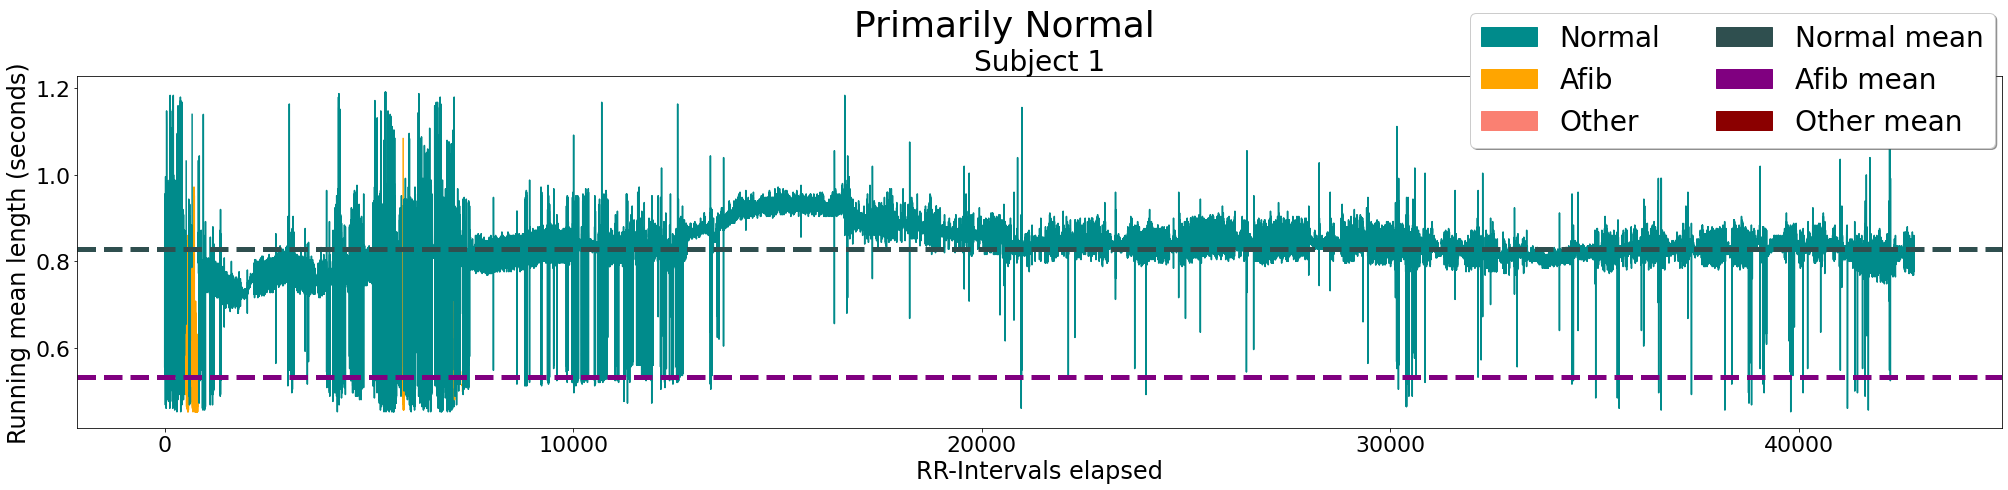

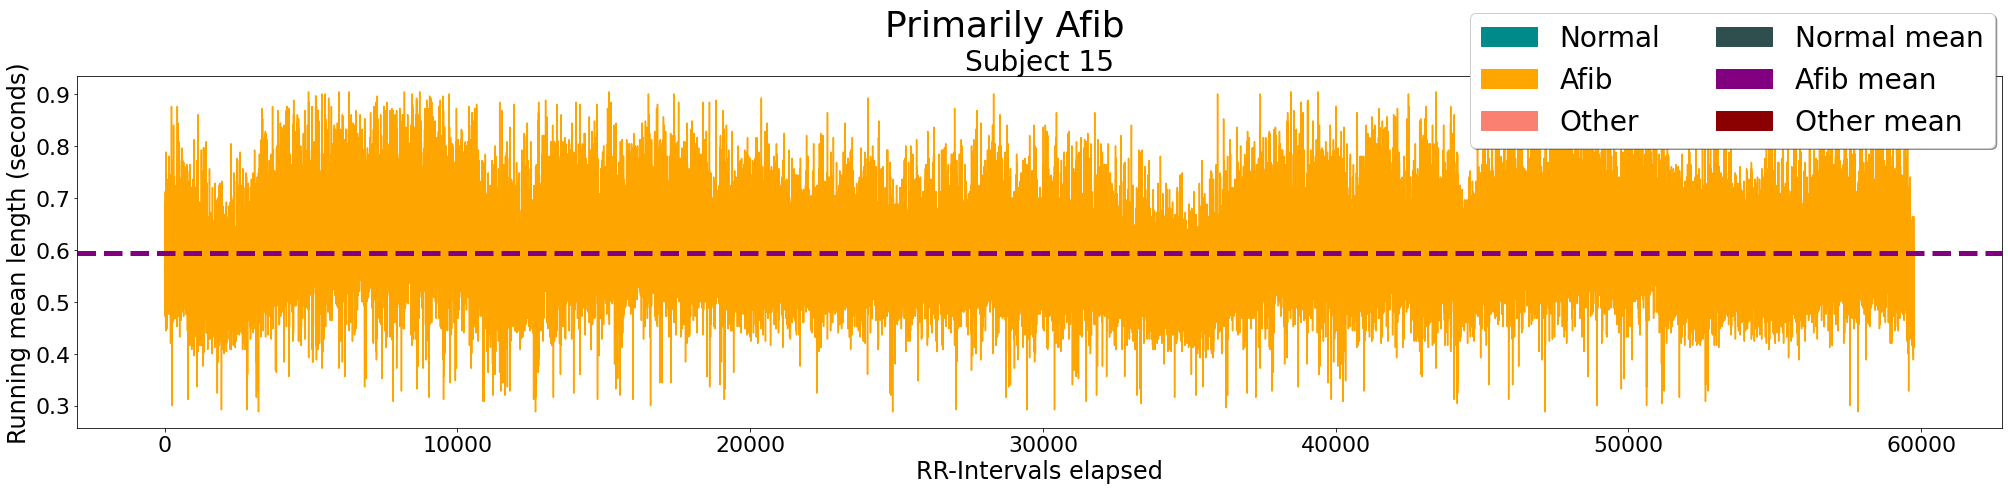

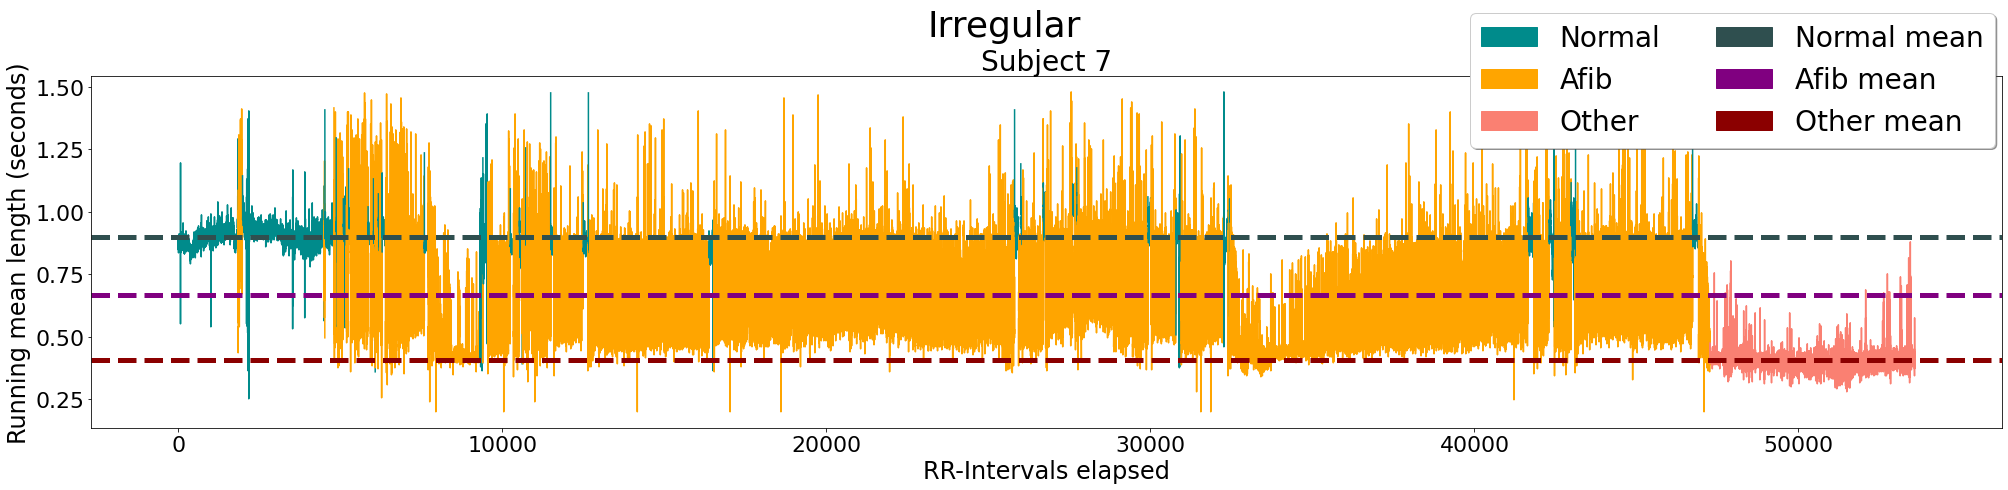

In [6]:
plot_time_plot(rr_ints, [1], 'rr_int_seconds', 2, 1, 'Primarily Normal')
plot_time_plot(rr_ints, [15], 'rr_int_seconds', 2, 1, 'Primarily Afib')
#plot_time_plot(rr_ints, [2, 19], 'rr_int_seconds', 2, 1, 'Both Prevalent')
plot_time_plot(rr_ints, [7], 'rr_int_seconds', 2, 1, 'Irregular')